In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from konlpy.tag import Hannanum
from konlpy.tag import Komoran
from hanspell import spell_checker
import re
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Kkma
from sklearn.linear_model import Lasso
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from soynlp.normalizer import *
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2

In [2]:
df = pd.read_csv('./result/2021-04-16_구글 마켓컬리.csv')
df1 = pd.read_csv('./result/2021-04-16_마켓컬리.csv')

In [3]:
df.sort_values('date')

,name,ratings,date,helpful,comment,developer_comment
7394,강욱,5,2016-03-01,0,Good,NaN
7393,Jungyoon Choi,5,2016-03-01,1,더이상 밤늦게 슈퍼를 헤매고 다니지않아도됨,NaN
7391,김김,5,2016-03-02,7,"아는동생소개로알게된마켓컬리 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고,포장배송완벽함!내눈...",NaN
7374,반포한의원edy,1,2016-03-02,3,"모바일페이지도 그다지 편하지는않았는데, 이건 훨씬더 불편ㅜㅜ 인내심으로 결제까지 기...",NaN
7375,유재연,4,2016-03-02,17,고기랑 과일 몇 번 사먹었는데 괜찮더라구요~이제 앱까지 출시되었으니 자주 이용할 것...,NaN
...,...,...,...,...,...,...
4,박민,5,2021-04-16,0,물품다양 고퀄리티 원료굿 배송굿 서비스굿,NaN
3,이미옥,5,2021-04-16,0,빠른배송감사합니다,NaN
2,김한울,1,2021-04-16,0,가격대별로 볼수있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더있...,NaN
1,정용우,5,2021-04-16,0,깔끔한 앱,NaN


In [4]:
df1.sort_values('date')

,name,ratings,date,title,comment
2640,NaN,5,2016-02-20,완전사랑하는마켓컬리,마침내앱이나왔네요
2602,NaN,5,2016-03-02,드디어 앱으로!!!,반가운 앱출시 소식에 바로 다운 받았어요! 신속한 배송과 질높은 식재료에 값 또한 ...
2521,NaN,5,2016-03-02,마켓컬리 진짜 사랑해요~^^,알게 된 지 얼마 되지 않았지만 정말로 만족스럽게 쇼핑 하고 있습니다. 품질도 배송...
2520,NaN,5,2016-03-02,기다리던 마켓컬리 어플!!,진짜루 나올지몰랐는데 나왔네요 마켓컬리 어플!! 출퇴근길에 핸드폰으로 장보는 편인데...
2590,NaN,5,2016-03-02,앱 출시 축하,성장하고 편리해지는 서비스에 늘 감동입니다 주변 지인에게 엄청 소문내고있어요 번창하세요~
...,...,...,...,...,...
645,NaN,5,2021-04-14,신선. 정확. 친절,소비자 응대 만점. 재료및 맛도 완벽해요. 다만 다양하지 않아 좀 불편해요
1893,NaN,5,2021-04-14,배송이 빨라 좋네요.,배송도 빠르고 좋아요.
1312,NaN,5,2021-04-14,좋습니다,간편하게 장 볼 수 있어서 좋아요
358,NaN,4,2021-04-14,만족요~~,익일 새벽 배송되고 좋아요!!


In [5]:
df.describe()

,ratings,helpful
count,7395.000000,7395.000000
mean,4.368087,1.370521
std,1.230642,8.454966
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,283.000000


In [6]:
df = df[['date', 'comment', 'ratings']]
df1 = df1[['date', 'comment', 'ratings']]

In [7]:
df = df.dropna(axis = 0, how = 'any')
df1 = df1.dropna(axis = 0, how = 'any')
df = pd.concat([df, df1])
df = df.reset_index()
del df['index']

In [8]:
from soyspacing.countbase import CountSpace
def 띄어쓰기(text):
    verbose=False
    mc = 10  # min_count
    ft = 0.3 # force_abs_threshold
    nt =-0.3 # nonspace_threshold
    st = 0.3 # space_threshold


    sent_corrected, tags = model.correct(
    doc=text,
    verbose=verbose,
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc)
    sent_corrected, tags = model.correct(text)
    result = sent_corrected
    return result
corpus_fname = './result/134963_norm.txt'
model = CountSpace()
model.train(corpus_fname)    

df['comment'] = df['comment'].apply(lambda x: 띄어쓰기(x))
df.head()
    
    

all tags length = 694236 --> 57795, (num_doc = 15602)

,date,comment,ratings
0,2021-04-16,너무편리해요,5
1,2021-04-16,깔끔한 앱,5
2,2021-04-16,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더...,1
3,2021-04-16,빠른배송감사합니다,5
4,2021-04-16,물품다양 고퀄리티 원료굿 배송굿 서비스굿,5


In [9]:
#맞춤법 검사기
for i in tqdm(range(len(df))): 
    try: 
        result = spell_checker.check(df['comment'][i])
        a= result[1]
        df['comment'][i] = a
    except: 
        pass



D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
def text_cleaning(text):
    result = only_hangle(text)
    result = repeat_normalize(result, num_repeats=2) #반복적인 단어 응축(2번 이상인것들)
    result = emoticon_normalize(result,num_repeats=2) #반복적인 자음,모음 응축(2번 이상인것들)
    return result
df['ko_text'] = df['comment'].apply(lambda x: text_cleaning(x))
df.head()

,date,comment,ratings,ko_text
0,2021-04-16,너무편리해요,5,너무편리해요
1,2021-04-16,깔끔한 앱,5,깔끔한 앱
2,2021-04-16,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더...,1,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 원만 딱 원 더 골르면 더있음 쿠폰쓸수...
3,2021-04-16,빠른배송감사합니다,5,빠른배송감사합니다
4,2021-04-16,물품다양 고퀄리티 원료굿 배송굿 서비스굿,5,물품다양 고퀄리티 원료굿 배송굿 서비스굿


In [11]:
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus
from soynlp.tokenizer import LTokenizer
word_extractor = WordExtractor(min_frequency=100,
   min_cohesion_forward=0.05,
   min_right_branching_entropy=0.0
)
word_extractor.train(df['ko_text'].values)
words = word_extractor.extract()
words

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)


training was done. used memory 0.751 Gb
all cohesion probabilities was computed. # words = 298
all branching entropies was computed # words = 10930
all accessor variety was computed # words = 10930


In [12]:
df['nouns'] = df['ko_text'].apply(lambda x: tokenizer.tokenize(x, remove_r=True)) # L과 R 분리하여 R은 삭제
df

,date,comment,ratings,ko_text,nouns
0,2021-04-16,너무편리해요,5,너무편리해요,[너무]
1,2021-04-16,깔끔한 앱,5,깔끔한 앱,"[깔끔, 앱]"
2,2021-04-16,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더...,1,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 원만 딱 원 더 골르면 더있음 쿠폰쓸수...,"[가격, 볼수, 있는, 기능, 좋겠, 딱, 원만, 딱, 원, 더, 골르면, 더있음,..."
3,2021-04-16,빠른배송감사합니다,5,빠른배송감사합니다,[빠른배송]
4,2021-04-16,물품다양 고퀄리티 원료굿 배송굿 서비스굿,5,물품다양 고퀄리티 원료굿 배송굿 서비스굿,"[물품다양, 고퀄리티, 원료굿, 배송, 서비스]"
...,...,...,...,...,...
10385,2016-03-02,매일 출근하면 컬리 사이트 보는게 일과였던 요즘~~ㅎㅎ 앱 출시로 더 가까이 접하게...,5,매일 출근하면 컬리 사이트 보는게 일과였던 요즘 ㅎㅎ 앱 출시로 더 가까이 접하게 ...,"[매일, 출근하면, 컬리, 사이트, 보는게, 일과였던, 요즘, ㅎㅎ, 앱, 출시로,..."
10386,2016-03-02,"시행착오가 있을듯은 하나,",1,시행착오가 있을듯은 하나,"[시행착오가, 있을듯은, 하나]"
10387,2016-03-02,드뎌 컬리앱이 나왔네요,5,드뎌 컬리앱이 나왔네요,"[드뎌, 컬리, 나왔네요]"
10388,2016-03-02,처음 런칭했을 때가 신혼 초였는데요. 7개월 된 아기 엄마가 된 지금까지 참새 방앗...,5,처음 런칭했을 때가 신혼 초였는데요 개월 된 아기 엄마가 된 지금까지 참새 방앗간처...,"[처음, 런칭했을, 때가, 신혼, 초였는데요, 개월, 된, 아기, 엄마가, 된, 지..."


In [13]:
df.describe()

,ratings
count,10390.000000
mean,4.352936
std,1.237850
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [14]:
df = df.reset_index()
del df['index']

In [139]:
# 한국어 약식 불용어사전 예시 파일 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "./korean_stopwords단어15개용.txt"

with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = tokenizer
    nouns = nouns_tagger.tokenize(x, remove_r=True)
    nouns = ','.join(nouns)
    nouns_tagger2 =  Okt()
    nouns = nouns_tagger2.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [140]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
for i in tqdm(range(len(df))):
    if not df['nouns'][i]:
        df.drop([i],inplace=True)
        
df.reset_index(inplace=True)
del df['index']
print(df.shape)
df.head()


(6105, 6)


,date,comment,ratings,ko_text,nouns,y
0,2021-04-16,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더...,1,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 원만 딱 원 더 골르면 더있음 쿠폰쓸수...,"[가격, 대별, 기능, 원만, 쿠폰]",0
1,2021-04-16,물품다양 고퀄리티 원료굿 배송굿 서비스굿,5,물품다양 고퀄리티 원료굿 배송굿 서비스굿,"[다양, 퀄리티, 원료]",1
2,2021-04-16,추 .ㅊ. ㅓ.ㅇ .ㅣ : ( 222444 ) 진짜 좋아요.~~^^ 잘 사용.하고 ...,5,추 ㅊ ㅓ ㅇ ㅣ 진짜 좋아요 잘 사용 하고 있습니다 실은 전에 쿠팡 로켓프 레쉬를...,"[진짜, 쿠팡, 레쉬, 박스, 어서, 회원, 탈퇴, 사이, 구매, 관건, 부디, 성...",1
3,2021-04-15,다 좋은데 후기 수정할 수 있으면 좋겠어요,4,다 좋은데 후기 수정할 수 있으면 좋겠어요,"[후기, 수정]",1
4,2021-04-15,가입은 진즉에 했는데 첫주문을 뒤늦게 하면서 왜 이제서야 주문을 했는지 후회막심입니...,5,가입은 진즉에 했는데 첫주문을 뒤늦게 하면서 왜 이제서야 주문을 했는지 후회막심입니...,"[가입, 진즉, 후회, 막심, 실패, 이지, 관심, 등록]",1


In [141]:
all_words = []
satisfaction= []
for i in range(len(df)):
    words = df['nouns'][i]
    words_arr = []
    for n in words:
        words_arr.append(n)
        satisfaction.append(df['ratings'].iloc[i])
    all_words.extend(words_arr)
    
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()        
    

,words,satisfaction,count
0,가격,1,1
1,대별,1,1
2,기능,1,1
3,원만,1,1
4,쿠폰,1,1


In [142]:
words_satisfaction = all_words_df.groupby('words').mean()['satisfaction']
words_count = all_words_df.groupby('words').sum()['count']
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head(20)

,satisfaction,count
words,,
가감,5.000000,1
가게,3.875000,8
가격,4.116809,351
가계,1.000000,1
가공,4.000000,6
가구,4.437500,16
가구라,5.000000,2
가까이,3.333333,6
가나,3.000000,2


In [143]:
words_df = words_df.loc[words_df['count']>=3]
words_df.sort_values('satisfaction', ascending=False)

,satisfaction,count
words,,
끼리,5.0,3
쏠쏠,5.0,9
리해,5.0,3
나날이,5.0,4
쏙쏙,5.0,3
...,...,...
기름,1.0,3
기껏,1.0,5
기기,1.0,4


In [144]:
words_df.sort_values('count', ascending =False).head(20)

,satisfaction,count
words,,
포장,4.501931,518
구매,3.984375,512
쿠폰,4.053398,412
물건,4.081232,357
가격,4.116809,351
결제,2.965079,315
가입,2.138790,281
어플,3.330739,257
기능,3.898039,255


In [145]:
korean_stopwords_path = "./korean_stopwords단어15개용.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
def text_cleaning(text):
    result = only_hangle(text)
    result = repeat_normalize(result, num_repeats=2) #num_repeats 
    result = emoticon_normalize(result,num_repeats=2 )
    nouns_tagger = tokenizer
    nouns = nouns_tagger.tokenize(result, remove_r=True)
    nouns = ','.join(nouns)
    nouns_tagger2 =  Okt()
    nouns = nouns_tagger2.nouns(nouns)
    nouns = [x for x in nouns if len(x) >1]
    nouns =[x for x in nouns if x not in stopwords]
    return nouns

vect = CountVectorizer(tokenizer= lambda x : text_cleaning(x))
bow_vect = vect.fit_transform(df['comment'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [146]:
bow_vect.shape

(6105, 3736)

In [147]:
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100])

{'가감': 1, '가게': 8, '가격': 337, '가계': 1, '가공': 6, '가구': 16, '가구라': 2, '가까이': 6, '가나': 1, '가능': 110, '가


In [148]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [149]:
print(tf_idf_vect[0])

  (0, 3268)	0.34889089550373437
  (0, 2341)	0.7818746892748921
  (0, 385)	0.3859463277879903
  (0, 2)	0.34350042994566726


In [150]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100])

{2: '가격', 385: '기능', 2341: '원만', 3268: '쿠폰', 585: '다양', 3272: '퀄리티', 2340: '원료', 2999: '진짜', 3266: '


In [151]:
df.sample(10).head()

,date,comment,ratings,ko_text,nouns,y
3204,2020-01-12,가입미끼 제품 없음. 재고 없음,1,가입미끼 제품 없음 재고 없음,"[가입, 재고]",0
1869,2020-07-05,아이디랑 비밀번호 둘 다 잊어서 아이디를 찾으ㅕ고 했는데 아이디 일부분만 보여주면 ...,3,아이디랑 비밀번호 둘 다 잊어서 아이디를 찾으ㅕ고 했는데 아이디 일부분만 보여주면 ...,"[아이디, 비밀번호, 아이디, 아이디, 일부분, 비밀번호]",0
1193,2020-11-06,모든 상품 품질이 싱싱함,5,모든 상품 품질이 싱싱함,"[모든, 품질]",1
3286,2019-12-05,다음페이지로 넘어가려면 두세번 에러나네요. 에러가 너무 심한거 알고있죠?,1,다음페이지로 넘어가려면 두세번 에러나네요 에러가 너무 심한거 알고있죠,"[페이지, 세번, 에러, 에러]",0
1419,2020-09-21,이것저것 물품도 많은것 같고 전 마음에 듭니다,4,이것저것 물품도 많은것 같고 전 마음에 듭니다,[듭니],1


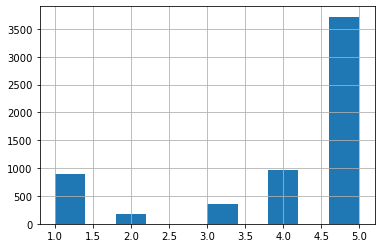

In [152]:
df.ratings.hist()

In [153]:
def rating_to_label(rating) :
  if rating >3:
    return 1
  else:
    return 0
df['y'] = df['ratings'].apply(lambda x : rating_to_label(x))

In [154]:
df

,date,comment,ratings,ko_text,nouns,y
0,2021-04-16,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 5000원만 딱3000원 더 골르면 더...,1,가격대별로 볼수 있는 기능있음 좋겠습니다 딱 원만 딱 원 더 골르면 더있음 쿠폰쓸수...,"[가격, 대별, 기능, 원만, 쿠폰]",0
1,2021-04-16,물품다양 고퀄리티 원료굿 배송굿 서비스굿,5,물품다양 고퀄리티 원료굿 배송굿 서비스굿,"[다양, 퀄리티, 원료]",1
2,2021-04-16,추 .ㅊ. ㅓ.ㅇ .ㅣ : ( 222444 ) 진짜 좋아요.~~^^ 잘 사용.하고 ...,5,추 ㅊ ㅓ ㅇ ㅣ 진짜 좋아요 잘 사용 하고 있습니다 실은 전에 쿠팡 로켓프 레쉬를...,"[진짜, 쿠팡, 레쉬, 박스, 어서, 회원, 탈퇴, 사이, 구매, 관건, 부디, 성...",1
3,2021-04-15,다 좋은데 후기 수정할 수 있으면 좋겠어요,4,다 좋은데 후기 수정할 수 있으면 좋겠어요,"[후기, 수정]",1
4,2021-04-15,가입은 진즉에 했는데 첫주문을 뒤늦게 하면서 왜 이제서야 주문을 했는지 후회막심입니...,5,가입은 진즉에 했는데 첫주문을 뒤늦게 하면서 왜 이제서야 주문을 했는지 후회막심입니...,"[가입, 진즉, 후회, 막심, 실패, 이지, 관심, 등록]",1
...,...,...,...,...,...,...
6100,2016-03-25,사이트에서 구매하며,5,사이트에서 구매하며,"[사이트, 구매]",1
6101,2016-03-02,매일 출근하면 컬리 사이트 보는게 일과였던 요즘~~ㅎㅎ 앱 출시로 더 가까이 접하게...,5,매일 출근하면 컬리 사이트 보는게 일과였던 요즘 ㅎㅎ 앱 출시로 더 가까이 접하게 ...,"[출근, 사이트, 일과, 출시, 가까이, 맞벌이, 사이트, 신랑, 널리, 널리, 지...",1
6102,2016-03-02,"시행착오가 있을듯은 하나,",1,시행착오가 있을듯은 하나,[시행착오],0
6103,2016-03-02,드뎌 컬리앱이 나왔네요,5,드뎌 컬리앱이 나왔네요,[드뎌],1


In [155]:
df.y.value_counts()

1    4679
0    1426
Name: y, dtype: int64

In [156]:
y= df['y']
X_train,X_test, y_train, y_test = train_test_split(tf_idf_vect, y, test_size = 0.3, random_state=32)

In [157]:
print(X_test.shape)

(1832, 3736)


# 로지스틱 회귀

In [158]:
#불용어 배송 아래부터 바꾸면 됨 배송이란 단어를 남기고싶으면
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 82.75%


In [159]:
scores = cross_val_score(lr, tf_idf_vect, y, cv=15) # model, train, target, cross validation

print('cross-val-score \n{}'.format(scores))

print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.82063882 0.85012285 0.83783784 0.84766585 0.83783784 0.84029484
 0.86486486 0.85749386 0.81818182 0.83538084 0.80835381 0.84520885
 0.8034398  0.82800983 0.80589681]
cross-val-score.mean 
0.833


In [160]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.78      0.39      0.52       439
           1       0.83      0.97      0.89      1393

    accuracy                           0.83      1832
   macro avg       0.81      0.68      0.71      1832
weighted avg       0.82      0.83      0.80      1832



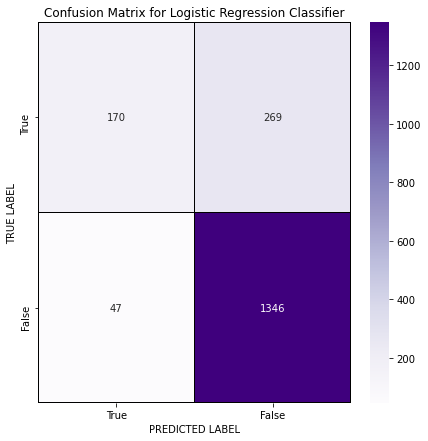

In [161]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["True", "False"]
y_axis_labels = ["True", "False"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [162]:
# plt.rcParams['figure.figsize'] = [10,8]
# plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [163]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)

In [164]:
i =0
sd  = pd.DataFrame(index=range(0,15), columns=['단어', '오즈비'])
for coef in coef_pos_index[:15]:
  print(invert_index_vectorizer[coef[1]]) #띄어쓰기 ,soynlp konlpy  한국어 
  sd.loc[i] = [invert_index_vectorizer[coef[1]],round(coef[0],2) ]
  i = i+1


신선
편리
품질
포장
간편
할인
퀄리티
혜택
친환경
구성
일찍
진작
모든
주시
느낌


In [165]:
sd

,단어,오즈비
0,신선,2.5
1,편리,2.35
2,품질,2.12
3,포장,1.59
4,간편,1.38
5,할인,1.32
6,퀄리티,1.28
7,혜택,1.22
8,친환경,1.17
9,구성,1.04


In [166]:
sd['오즈비'] = sd['오즈비'].apply(lambda x : np.exp(x))
sd

,단어,오즈비
0,신선,12.182494
1,편리,10.485570
2,품질,8.331137
3,포장,4.903749
4,간편,3.974902
5,할인,3.743421
6,퀄리티,3.596640
7,혜택,3.387188
8,친환경,3.221993
9,구성,2.829217


In [167]:
np.exp(2.8)

16.444646771097048

In [168]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])

가입 -3.001780802374701
블랙리스트 -2.9237731023939006
그냥 -2.89068963245133
문의 -2.655490762296698
최악 -2.654249097326034
회원 -2.5030268942580407
오류 -2.3624548022792475
설치 -2.2485739711559933
이유 -2.235842985635353
광고 -2.1888259434367807
페이지 -2.1411326956721957
삭제 -2.1372611321014894
실망 -2.0047578742226335
접속 -1.9900950513258595
노트 -1.9073610773242269
업데이트 -1.9000668831938392
카톡 -1.8241763147487278
엉망 -1.8241210027629733
문제 -1.817688269124495
로그인 -1.7828338809172335
다운로드 -1.7745130712809611
다운 -1.7566521259373176
별로 -1.7506433527908376
에러 -1.7052285380895167
환불 -1.683738190938978
탈퇴 -1.6819767343349432
갑자기 -1.6699555790978877
실행 -1.6645563762328495
과대 -1.6069828425540962
먹통 -1.5930320394181228
제주도 -1.5866534960830174
사라 -1.582888980324714
결제 -1.5802028721118264
연결 -1.5751331452570767
취소 -1.5526148944229148
입력 -1.5484993286975897
오아시스 -1.5344190423196988
장난 -1.5340879768383073
후기 -1.5326299203520788
아예 -1.5265398168878754
수가 -1.503357608037571
인증 -1.5025514977252517
네트워크 -1.4903348228955282
업뎃 -1.

In [169]:
for i in range(30,45):    
    y= df['y']
    X_train,X_test, y_train, y_test = train_test_split(tf_idf_vect, y, test_size = 0.3, random_state=i)
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(solver="lbfgs", max_iter=500)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
    coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)
    for coef in coef_pos_index[:15]:
      print(invert_index_vectorizer[coef[1]]) #띄어쓰기 ,soynlp konlpy  한국어 
    print(i,'----------------------------')

신선
편리
포장
품질
퀄리티
친환경
다양
간편
출시
덕분
일찍
모든
질도
혜택
더욱
30 ----------------------------
신선
편리
품질
포장
퀄리티
친환경
덕분
저렴
다양
일찍
혜택
구성
정리
주시
간편
31 ----------------------------
신선
편리
품질
포장
간편
할인
퀄리티
혜택
친환경
구성
일찍
진작
모든
주시
느낌
32 ----------------------------
편리
신선
포장
품질
간편
다양
퀄리티
할인
혜택
친환경
일찍
덕분
기대
안심
강추
33 ----------------------------
편리
신선
포장
품질
할인
퀄리티
친환경
혜택
간편
덕분
구성
다양
신뢰
일찍
물건
34 ----------------------------
신선
편리
포장
품질
혜택
덕분
간편
친환경
퀄리티
디자인
할인
모든
쿠폰
일찍
강추
35 ----------------------------
신선
편리
품질
포장
친환경
간편
혜택
퀄리티
모든
할인
구성
지금
주시
질도
일찍
36 ----------------------------
신선
편리
품질
포장
할인
친환경
다양
덕분
정리
혜택
지금
집앞
주시
모든
퀄리티
37 ----------------------------
신선
편리
간편
품질
포장
퀄리티
친환경
일찍
덕분
혜택
정리
할인
생활
더욱
고급
38 ----------------------------
신선
편리
품질
포장
퀄리티
할인
간편
친환경
혜택
덕분
나중
주시
일찍
이유식
가족
39 ----------------------------
신선
편리
퀄리티
품질
친환경
포장
다양
일찍
간편
할인
혜택
이유식
덕분
구입
적립
40 ----------------------------
신선
편리
품질
퀄리티
포장
구입
간편
친환경
덕분
디자인
물건
재미
다양
할인
일찍
41 ----------------------------
편리
신선
품질
포장
간편
친환경
혜택
퀄리티
일찍
다양
할인
직관
신뢰
듭니
집앞
4